### 工作進度  
* 【置頂】**新的筆記內容架構**與**量化技術分析系統**相關資訊請參閱[250801筆記.ipynb](https://github.com/yilintung/StockInvestmentNotebook/blob/main/250801%E7%AD%86%E8%A8%98.ipynb)之「工作進度」。  
* 本日「K線追擊週報」LINE群組資訊：[楊忠憲K線追擊週報_250923日報.docx](https://mega.nz/file/K4gE0S7A#9CWXfC4gmEWKGy7pux1m4jEQC2LzhPuchN2ZJEKkV1o)。  

* 引入模組與定義公用函式  

In [1]:
import numpy as np
import mysys
import markdown
import base64
from IPython.core.display import HTML

In [2]:
def stock_analysis( analysis, stock_id, buttom_pattern = False) :
    results,images = analysis.analysis(stock_id)
    if buttom_pattern is True and '底部型態' in images :
        print('底型反轉交易策略：')
        display(images['底部型態'])
    print('解盤內容：')
    if '整體評價' in images :
        display(images['整體評價'])
    result_md   = results.to_markdown(tablefmt="grid")
    result_html = markdown.markdown(result_md, extensions=['markdown_grid_tables:GridTableExtension'])
    display(HTML(result_html))

* 更新量化技術分析資料庫  

In [3]:
mysys.UpdatestockDatabase()

2025-09-23 21:25:03.411 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockInfo, data_id: 


##### 更新台股總覽 #####
##### 更新技術分析資料 #####


2025-09-23 21:25:05.239 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-09-23 21:25:36.796 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-09-23 21:25:42.174 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-09-23 21:26:15.419 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-09-23 21:26:20.648 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-09-23 21:26:52.940 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-09-23 21:26:58.416 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-09-23 21:27:30.115 | INFO     | FinMind.data.finmind_api:get_data:155 - download TaiwanStockPrice, data_id: 
2025-09-23 21:27:35.419 | INFO     | FinMind.data.finmind_api:get_data:155 - download Ta

日K：2025-09-23


* 建立「解盤」物件    

In [4]:
analysis = mysys.StockAnalysis()

### 大盤解盤  

* 加權指數  

> **盤後**：量化技術分析  

解盤內容：


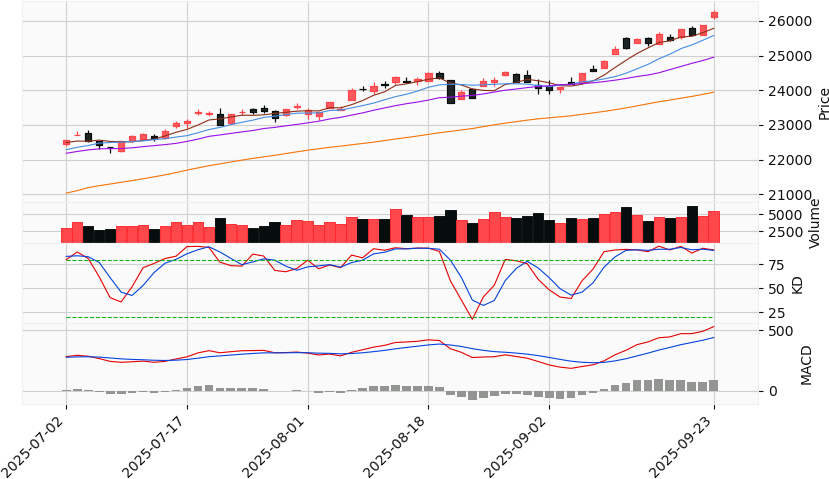

In [5]:
# 盤後：加權指數解盤
stock_analysis(analysis,'TAIEX')

* 櫃買指數   

> **盤後**：量化技術分析  

解盤內容：


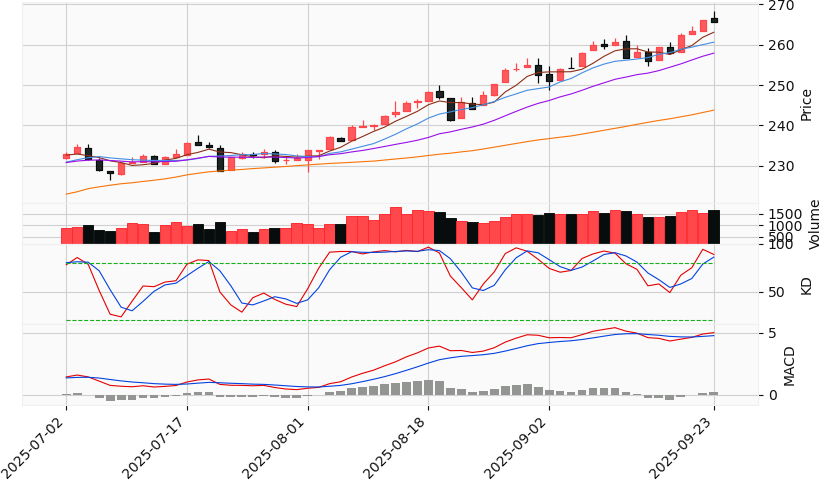

In [6]:
# 盤後：櫃買指數解盤
stock_analysis(analysis,'TPEx')

### 個股解盤  

* 盟立(2464)  
  看法：持續反彈，但力道不強。  

> **盤後**：量化技術分析  

解盤內容：


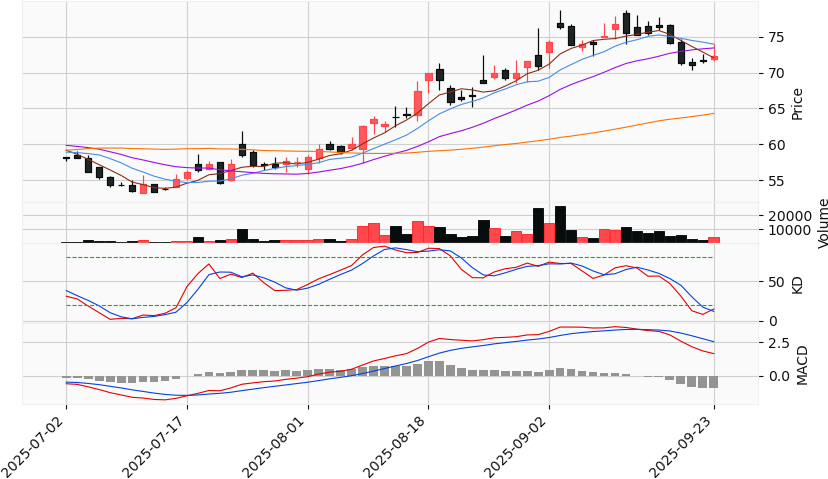

In [7]:
stock_analysis(analysis,'2464')

> **盤後**：底部反轉交易策略分析  

In [8]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-03-26'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-05-15']['Close']

    # 設定底部日期與價格
    bottom_date  = '2025-04-10'
    bottom_price = range_prices.loc['2025-04-10']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2025-08-15'

    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

估算目標價為78.10元


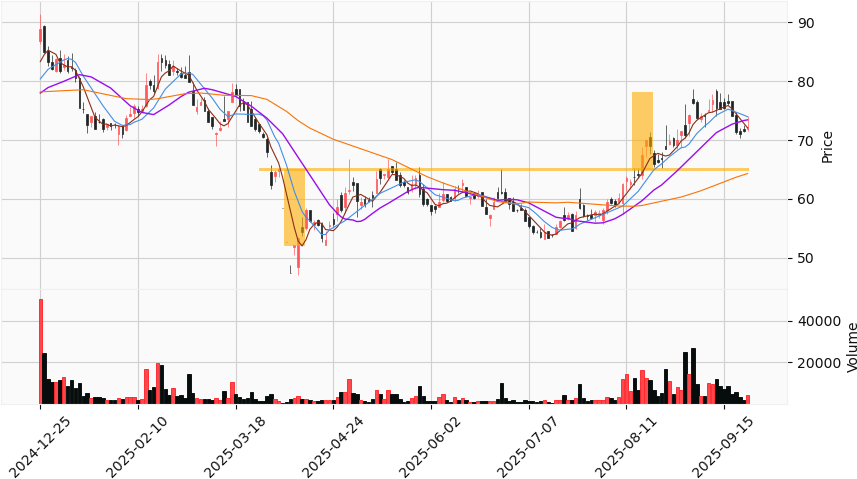

In [9]:
image = mysys.DrawOnKlineChart('2464','2024-12-25','2025-09-23',line_drawing_callback)
display(image)

籌碼面：  
法人小賣(-121)：外資小賣(-135)、投信中立(0)、自營小買(+14)。  
主力小賣(-189)。  
分公司買賣家數差分散(-37)。  
融資增(+26)、融券增(+23)。  

* 百和興業-KY(8404)  
  看法：突破壓力區間後又回落，這檔就追蹤至今日。    

> **盤後**：量化技術分析  

底型反轉交易策略：


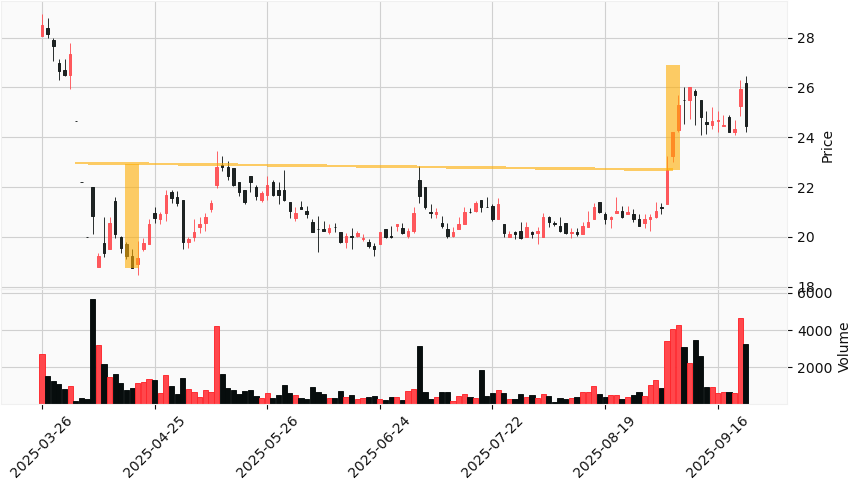

解盤內容：


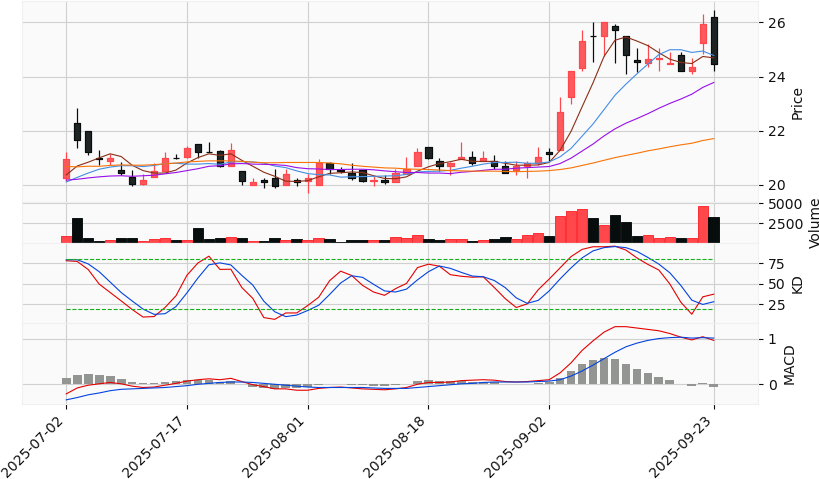

In [10]:
stock_analysis(analysis,'8404',buttom_pattern = True)

> **盤後**：底部反轉交易策略分析  

In [11]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-03-31'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-05-14']['Open']

    # 設定底部日期與價格
    bottom_date  = '2025-04-21'
    bottom_price = range_prices.loc['2025-04-21']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2025-09-04'

    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

估算目標價為27.05元


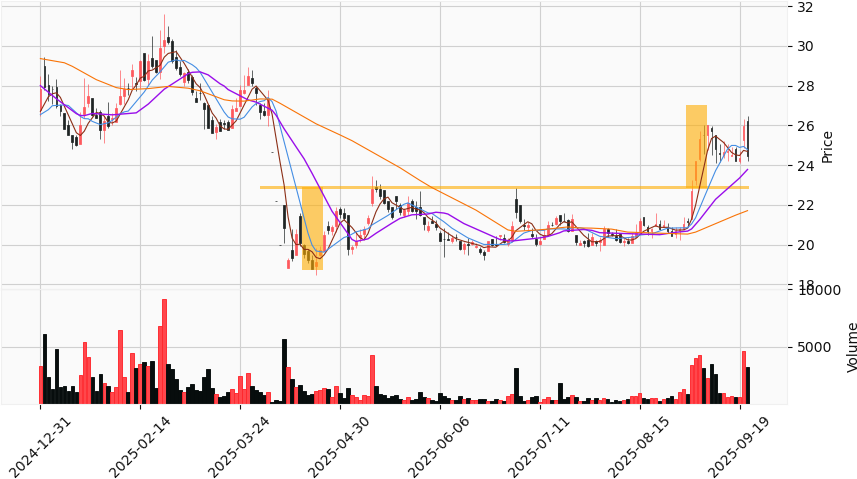

In [12]:
image = mysys.DrawOnKlineChart('8404','2024-12-31','2025-09-23',line_drawing_callback)
display(image)

籌碼面：  
法人大賣(-661)：外資大賣(-657)、投信中立(0)、自營小賣(-4)。  
主力大賣(-358)。  
分公司買賣家數差分散(-81)。  
融資大減(-254)、融券大增(+128)。  

* 南茂(8150)  
  看法：突破底部型態，但遇前壓後拉回留上影線。  
  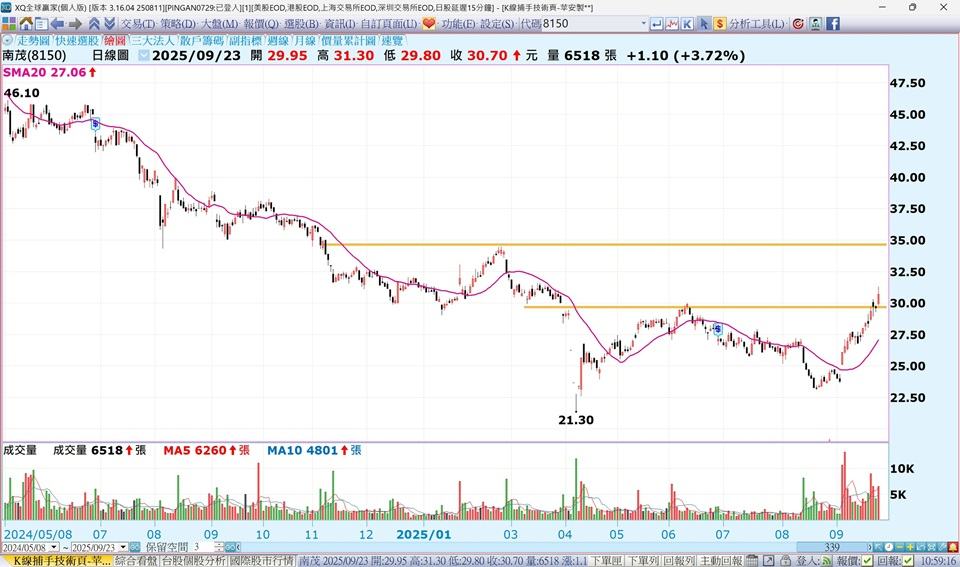  
  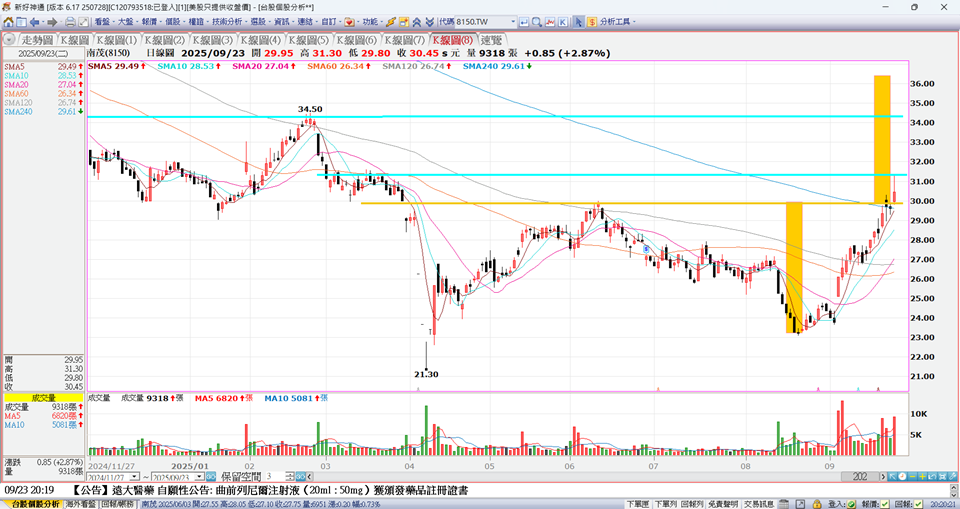   

> **盤後**：量化技術分析  

解盤內容：


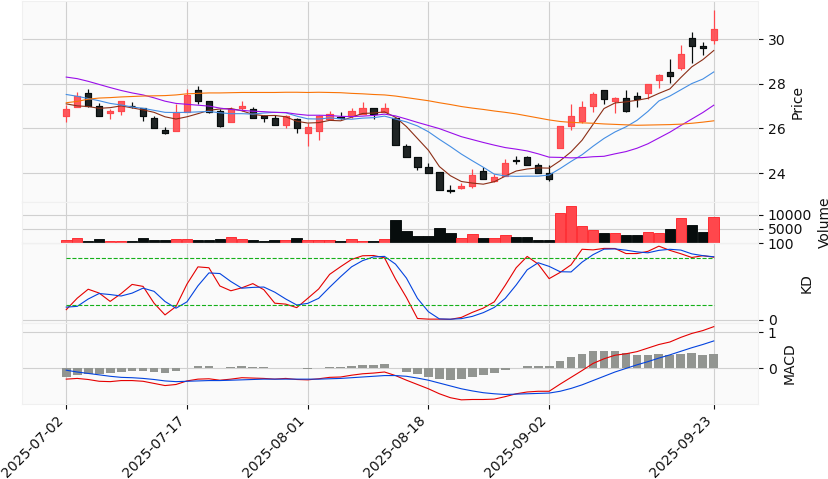

In [13]:
stock_analysis(analysis,'8150')

> **盤後**：底部反轉交易策略分析    

In [14]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-03-11'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-06-11']['Close']

    # 設定底部日期與價格
    bottom_date  = '2025-08-19'
    bottom_price = range_prices.loc['2025-08-19']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2025-09-17'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

估算目標價為36.55元


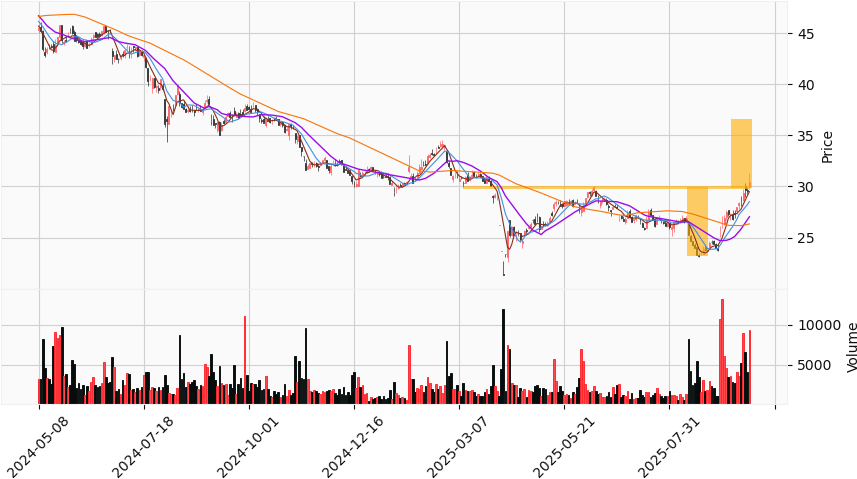

In [15]:
image = mysys.DrawOnKlineChart('8150','2024-05-08','2025-09-23',line_drawing_callback)
display(image)

籌碼面：  
法人大買(+1664)：外資大買(+1559)、投信中立(0)、自營小買(+105)。  
主力大買(+958)。  
分公司買賣家數差集中(+68)。  
融資減(-12)、融券增(+3)。  